In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


seed =1234

In [2]:
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=seed)
print(X.shape)
print(y.shape)


(500, 1)
(500,)


In [3]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, random_state=seed, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, random_state=seed, test_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(350, 1)
(350,)
(75, 1)
(75,)
(75, 1)
(75,)


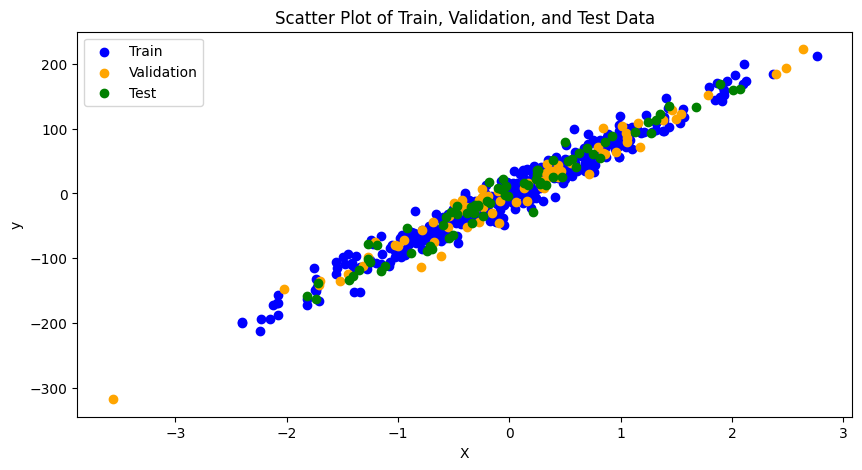

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.scatter(X_train, y_train, label='Train', color='blue')
plt.scatter(X_val, y_val, label='Validation', color='orange')
plt.scatter(X_test, y_test, label='Test', color='green')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Train, Validation, and Test Data')
plt.show()


In [5]:
from sklearn.linear_model import SGDRegressor
seed = 1
model = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=seed)
model.fit(X_train.reshape(-1, 1), y_train)


SGDRegressor(eta0=0.1, penalty=None, random_state=1)

In [6]:
y_pred_train = model.predict(X_train.reshape(-1, 1))
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate R2 and RMSE for validation data
y_pred_val = model.predict(X_val.reshape(-1, 1))
r2_val = r2_score(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Calculate R2 and RMSE for test data
y_pred_test = model.predict(X_test.reshape(-1, 1))
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print the results
print("R2 for train data:", r2_train)
print("RMSE for train data:", rmse_train)
print("R2 for validation data:", r2_val)
print("RMSE for validation data:", rmse_val)
print("R2 for test data:", r2_test)
print("RMSE for test data:", rmse_test)


R2 for train data: 0.9632139288378262
RMSE for train data: 15.36807608245175
R2 for validation data: 0.9675840110791281
RMSE for validation data: 15.828923430802067
R2 for test data: 0.9615813024966263
RMSE for test data: 15.391965104809627


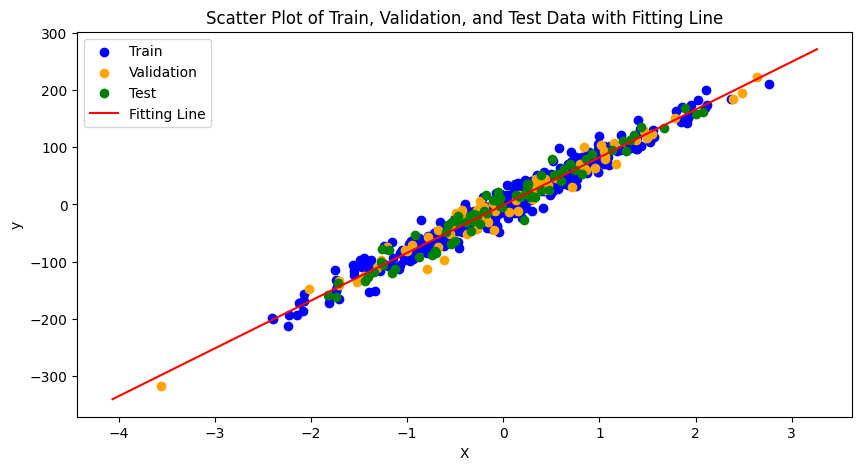

In [7]:
# Plot the fitting line
plt.figure(figsize=(10, 5))

plt.scatter(X_train, y_train, label='Train', color='blue')
plt.scatter(X_val, y_val, label='Validation', color='orange')
plt.scatter(X_test, y_test, label='Test', color='green')

x_min, x_max = X.min() - 0.5, X.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

plt.plot([x_min, x_max], [model.intercept_[0] + model.coef_[0] * x_min, model.intercept_[0] + model.coef_[0] * x_max], color='red', label='Fitting Line')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Train, Validation, and Test Data with Fitting Line')
plt.show()


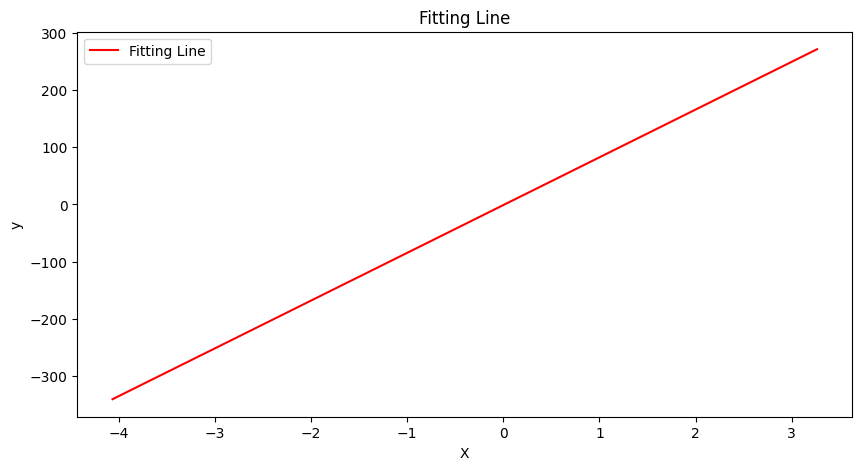

In [8]:

# Plot the fitting line
plt.figure(figsize=(10, 5))

x_min, x_max = X.min() - 0.5, X.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

plt.plot([x_min, x_max], [model.intercept_[0] + model.coef_[0] * x_min, model.intercept_[0] + model.coef_[0] * x_max], color='red', label='Fitting Line')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitting Line')
plt.show()


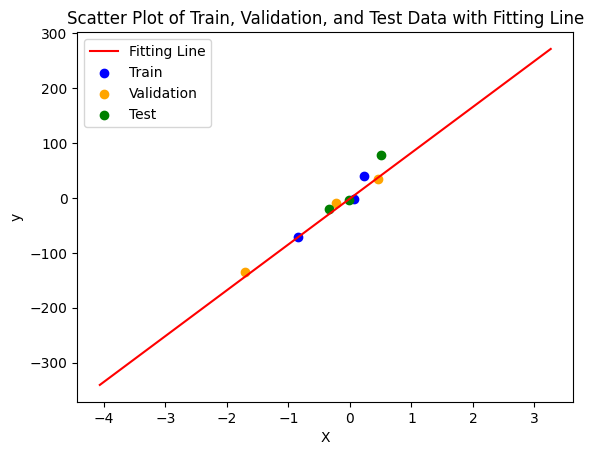

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random indices for train, validation, and test data
train_idx = np.random.randint(0, len(X_train), size=3)
val_idx = np.random.randint(0, len(X_val), size=3)
test_idx = np.random.randint(0, len(X_test), size=3)

# Plot the fitting line
x_min, x_max = X.min() - 0.5, X.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

plt.plot([x_min, x_max], [model.intercept_[0] + model.coef_[0] * x_min, model.intercept_[0] + model.coef_[0] * x_max], color='red', label='Fitting Line')

# Plot the random points from train, validation, and test data
plt.scatter(X_train[train_idx], y_train[train_idx], label='Train', color='blue')
plt.scatter(X_val[val_idx], y_val[val_idx], label='Validation', color='orange')
plt.scatter(X_test[test_idx], y_test[test_idx], label='Test', color='green')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Train, Validation, and Test Data with Fitting Line')
plt.show()


In [20]:
np.random.rand(10,1).shape

(10, 1)

In [39]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters= 500):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

        self.train_losses = []
        self.val_losses = []
    def fit(self, X_train, y_train, X_val = None, y_val = None):
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features)
        self.bias = 0

        for i in range(self.n_iters):
            self.train_losses.append(self.loss(X_train, y_train))
            self.val_losses.append(self.loss(X_val, y_val))

            y_pred = np.dot(X_train, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X_train.T, y_pred - y_train)
            db = (1 / num_samples) * np.sum(y_pred - y_train)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def loss(self, X, y):
      y_pred = self.predict(X)
      rmse = np.sqrt(mean_squared_error(y, y_pred))
      return rmse

    def predict(self, X):
        return np.dot(X.reshape(-1, 1), self.weights) + self.bias

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train, X_val, y_val)

In [42]:
y_pred_train = lr.predict(X_train.reshape(-1, 1))
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate R2 and RMSE for validation data
y_pred_val = lr.predict(X_val.reshape(-1, 1))
r2_val = r2_score(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Calculate R2 and RMSE for test data
y_pred_test = lr.predict(X_test.reshape(-1, 1))
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print the results
print("R2 for train data:", r2_train)
print("RMSE for train data:", rmse_train)
print("R2 for validation data:", r2_val)
print("RMSE for validation data:", rmse_val)
print("R2 for test data:", r2_test)
print("RMSE for test data:", rmse_test)

R2 for train data: 0.9617840147119081
RMSE for train data: 15.663915409669842
R2 for validation data: 0.966598567066863
RMSE for validation data: 16.06772129338699
R2 for test data: 0.9574439562039277
RMSE for test data: 16.199565835450844


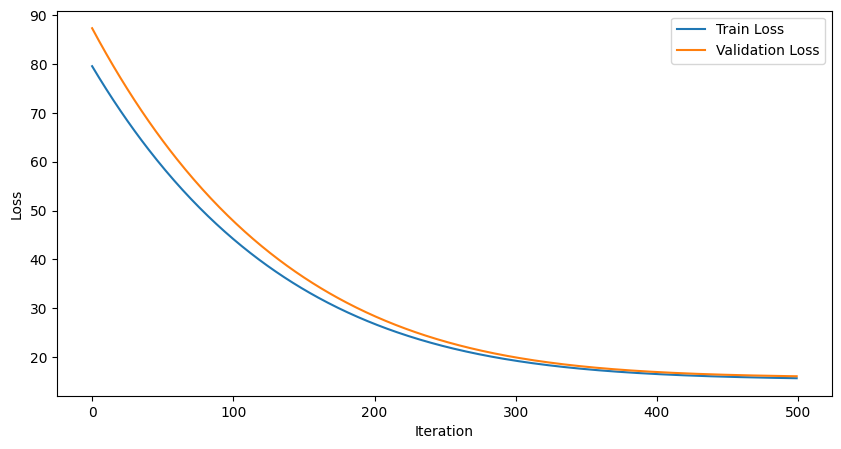

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(lr.train_losses, label='Train Loss')
plt.plot(lr.val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()